In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
#Upload CSV data file
os.getcwd()

'C:\\Users\\MyPC'

In [3]:
#Upload the CSV file
bike_rental=pd.read_csv("day.csv")

In [4]:
bike_rental.shape

(731, 16)

In [5]:
bike_rental.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
#Changing the data type of variables
cat_names=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
for i in cat_names:
    print(i)
    bike_rental.loc[:,i]=bike_rental.loc[:,i].astype(str)

season
yr
mnth
holiday
weekday
workingday
weathersit


In [7]:
#Get column names
def get_cnames(data):
    all_cnames=[]
    num_cnames=[]
    cat_cnames=[]
    for i in data.columns:
        all_cnames.append(str(i))
        if(data[i].dtype=="object"):
            cat_cnames.append(str(i))
        else:
            num_cnames.append(str(i))
    cnames=[all_cnames,num_cnames,cat_cnames]
    return(cnames)
#get cnames   cnames[0]-all
#cnames[1]-numeric cnames
#cnames[2]-categorical cnames
cnames=get_cnames(bike_rental)


#get rows and columns
rows=bike_rental.shape[0]
columns=bike_rental.shape[1]

In [8]:
#Missing_Value_Analysis
missing_value=pd.DataFrame(bike_rental.isnull().sum())
missing_value
#No missing value is present in the data

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


[Text(0,0.5,'Users Count'), Text(0.5,0,'Year'), None]

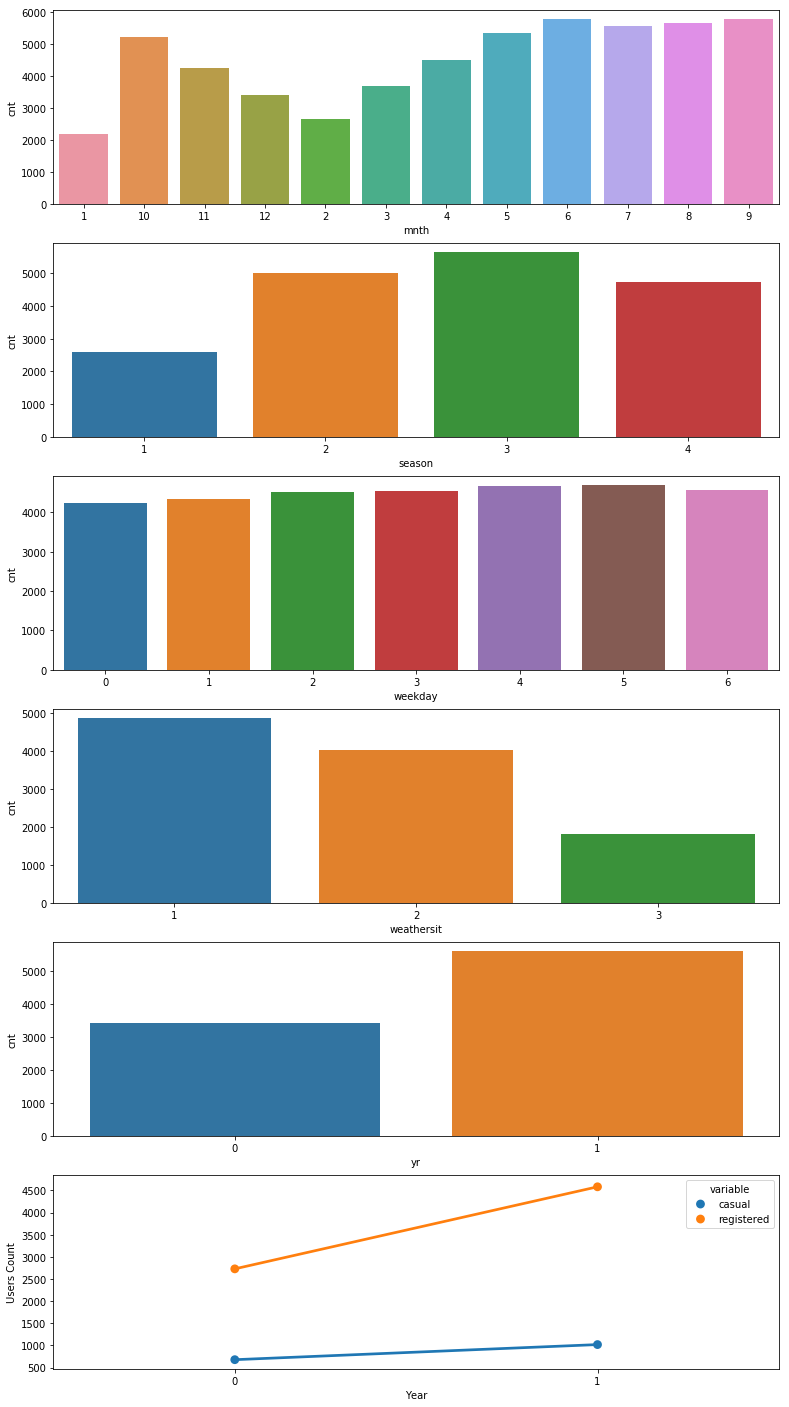

In [9]:
#Load the library
import seaborn as sn
#Visualizing the Raw Data
fig,(ax1,ax2,ax3,ax4, ax5, ax6)= plt.subplots(nrows=6)
fig.set_size_inches(13,25)
cnt_by_mnth = pd.DataFrame(bike_rental.groupby("mnth")["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_mnth,x="mnth",y="cnt",ax=ax1)

cnt_by_season = pd.DataFrame(bike_rental.groupby(["season"])["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_season,x="season",y="cnt",ax=ax2)

cnt_by_weekday = pd.DataFrame(bike_rental.groupby("weekday")["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_weekday,x="weekday",y="cnt",ax=ax3)

cnt_by_weathersit = pd.DataFrame(bike_rental.groupby("weathersit")["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_weathersit,x="weathersit",y="cnt",ax=ax4)

cnt_by_yr = pd.DataFrame(bike_rental.groupby("yr")["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_yr,x="yr",y="cnt",ax=ax5)

transformed = pd.melt(bike_rental[["yr","casual","registered"]], id_vars=['yr'], value_vars=['casual', 'registered'])
cnt_by_user= pd.DataFrame(transformed.groupby(["yr","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=cnt_by_user["yr"], y=cnt_by_user["value"],hue=cnt_by_user["variable"],hue_order=["casual","registered"], data=transformed, join=True,ax=ax6)
ax6.set(xlabel='Year', ylabel='Users Count',label='big')

C:\Users\MyPC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


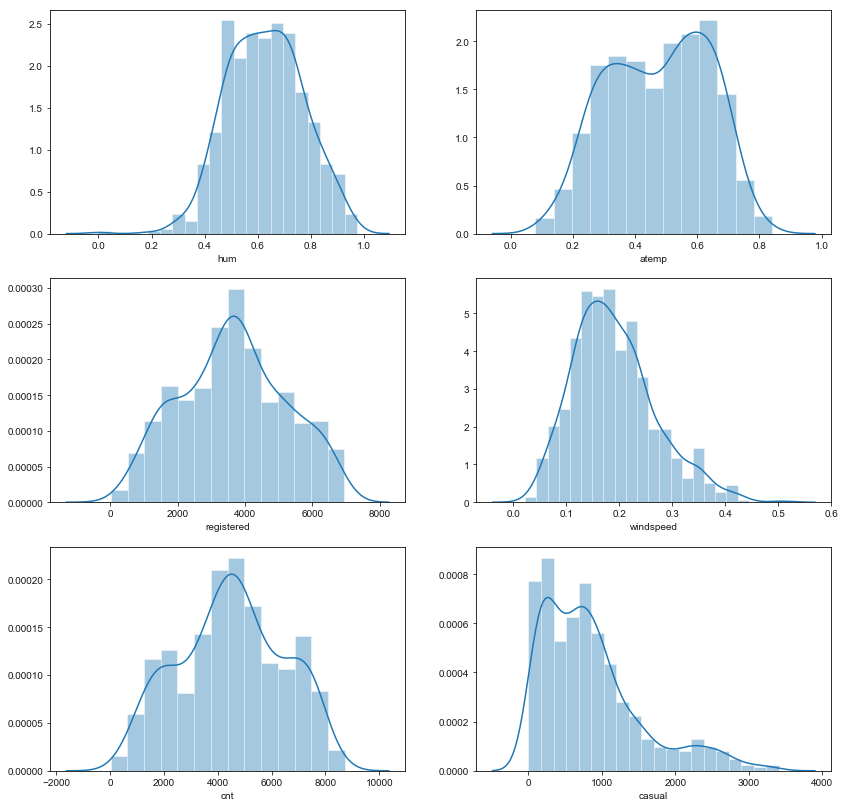

In [10]:
#Histograms before removing outliers
a4_dims = (14, 14)
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=a4_dims)
sn.set(color_codes=True)
sn.set(style="white", palette="muted")
sn.distplot(bike_rental['hum'], ax=axes[0][0])
sn.distplot(bike_rental['atemp'], ax=axes[0][1])
sn.distplot(bike_rental['registered'], ax=axes[1][0])
sn.distplot(bike_rental['windspeed'], ax=axes[1][1])
sn.distplot(bike_rental['cnt'], ax=axes[2][0])
sn.distplot(bike_rental['casual'], ax=axes[2][1])

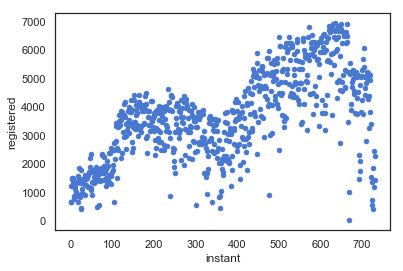

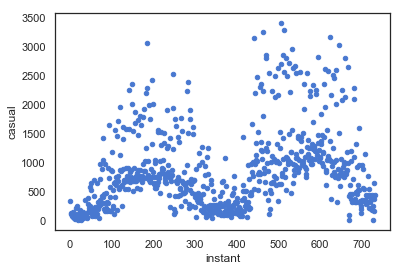

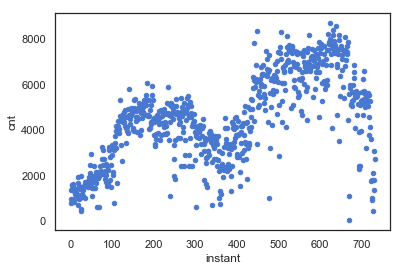

In [11]:
#PLotting Scatter Plot
#Visualizing distribution 
ax8 =bike_rental.plot(kind='scatter',x='instant', y='registered')
ax9 = bike_rental.plot(kind='scatter',x='instant', y='casual')
ax10 = bike_rental.plot(kind='scatter',x='instant', y='cnt')

In [12]:
#Outlier Analysis
out_data=bike_rental.loc[:,cnames[1]]
out_data.drop(["cnt"], axis = 1, inplace = True )
onames=out_data.columns
onames
for i in onames:
    q75,q25=np.percentile(bike_rental.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25 - (1.5*iqr)
    max=q75 + (1.5*iqr)
    bike_rental.loc[bike_rental[i]<min,i]=np.nan
    bike_rental.loc[bike_rental[i]>max,i]=np.nan

In [13]:
# #Calculating missing value after outlier analysis
missing_val = pd.DataFrame(bike_rental.isnull().sum())
missing_val

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [14]:
#Impute missing  values using median
bike_rental['hum']=bike_rental['hum'].fillna(bike_rental['hum'].median())
bike_rental['windspeed']=bike_rental['windspeed'].fillna(bike_rental['windspeed'].median())
bike_rental['casual']=bike_rental['casual'].fillna(bike_rental['casual'].median())

C:\Users\MyPC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


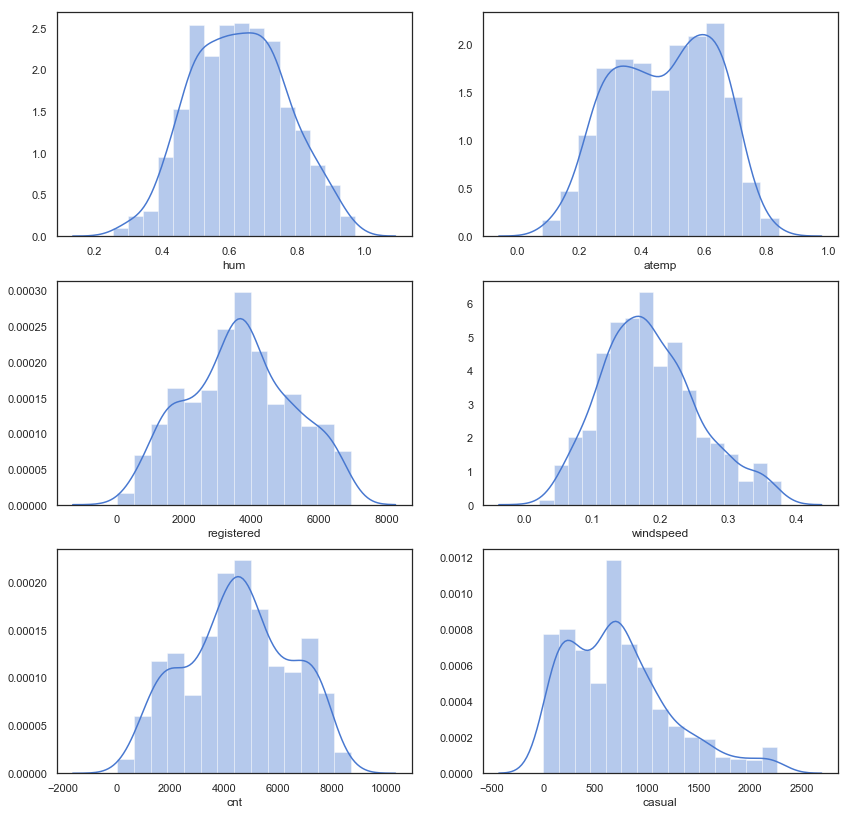

In [15]:
#Histograms After Outlier Analysis
a4_dims = (14, 14)
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=a4_dims)
sn.set(color_codes=True)
sn.set(style="white", palette="muted")
sn.distplot(bike_rental['hum'], ax=axes[0][0])
sn.distplot(bike_rental['atemp'], ax=axes[0][1])
sn.distplot(bike_rental['registered'], ax=axes[1][0])
sn.distplot(bike_rental['windspeed'], ax=axes[1][1])
sn.distplot(bike_rental['cnt'], ax=axes[2][0])
sn.distplot(bike_rental['casual'], ax=axes[2][1])

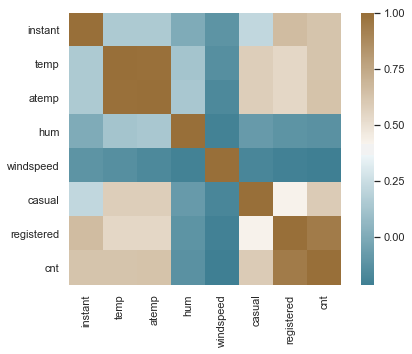

In [16]:
#Feature Selection
#Correlation Analysis
cor=cnames[1]
bike_rental_corr=bike_rental.loc[:,cor]
f,ax=plt.subplots(figsize=(7,5))
corr=bike_rental_corr.corr()
import seaborn as sns
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,50,as_cmap=True),square=True,ax=ax)

In [17]:
correlations = bike_rental.corr()
correlations
correlations.style.background_gradient()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1,0.15058,0.152638,0.00159154,-0.114853,0.219604,0.659623,0.62883
temp,0.15058,1,0.991702,0.123723,-0.138937,0.579585,0.540012,0.627494
atemp,0.152638,0.991702,1,0.137312,-0.164157,0.578667,0.544192,0.631066
hum,0.00159154,0.123723,0.137312,1,-0.200237,-0.0788841,-0.112172,-0.121454
windspeed,-0.114853,-0.138937,-0.164157,-0.200237,1,-0.17859,-0.203055,-0.215203
casual,0.219604,0.579585,0.578667,-0.0788841,-0.17859,1,0.421641,0.593953
registered,0.659623,0.540012,0.544192,-0.112172,-0.203055,0.421641,1,0.945517
cnt,0.62883,0.627494,0.631066,-0.121454,-0.215203,0.593953,0.945517,1


In [18]:
#Feature Selection Using Anova Test
#ANOVA Analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols


cw_lm=ols('cnt ~ C(yr)+C(holiday)+C(workingday)+ C(mnth)+C(weekday)+ C(weathersit)+C(season)', data=bike_rental).fit() 
print(sm.stats.anova_lm(cw_lm, typ=2))

                     sum_sq     df            F         PR(>F)
C(yr)          8.281765e+08    1.0  1140.165127  1.645182e-149
C(holiday)     2.982315e+05    1.0     0.410581   5.218829e-01
C(workingday)  1.897657e+07    1.0    26.125377   4.123844e-07
C(mnth)        1.756683e+08   11.0    21.985966   8.868496e-39
C(weekday)     1.621156e+07    6.0     3.719791   1.193190e-03
C(weathersit)  1.856596e+08    2.0   127.800423   4.274469e-48
C(season)      6.632745e+07    3.0    30.438053   1.635986e-18
Residual       5.128140e+08  706.0          NaN            NaN


In [19]:
#Dimensionality Reduction
bike_rental=bike_rental.drop(['weekday','instant','dteday','atemp'],axis=1)

In [20]:
df=bike_rental.copy()
bike_rental=df.copy()

In [21]:
#Feature Scaling
fea_name=['casual','registered']
for i in fea_name:
    print(i)
    bike_rental[i]=(bike_rental[i]-np.min(bike_rental[i]))/(np.max(bike_rental[i])-np.min(bike_rental[i]))

casual
registered


In [22]:
#Error metrix
from sklearn.metrics import mean_squared_error
from math import sqrt
def MAPE(y,yhat):
    print(np.mean(np.abs((y - yhat) / y))*100)

In [24]:
#Model Development



##Linear Regression Model
X=bike_rental.iloc[:,:-1].values
Y=bike_rental.iloc[:,11].values
#Splitting the data in train and testing


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [25]:
#Multiple Linear Regression:
from sklearn.linear_model import LinearRegression
lm_model=LinearRegression()
lm_model.fit(X_train,Y_train)
lm_predict=lm_model.predict(X_test)

In [26]:
MAPE(Y_test,lm_predict)

6.796663544486571


In [29]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor()
DT_model.fit(X_train,Y_train)
DT_predict=DT_model.predict(X_test)
MAPE(Y_test,DT_predict)


4.006397973628629


In [30]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor()
RF_model.fit(X_train,Y_train)
RF_predict=RF_model.predict(X_test)
MAPE(Y_test,RF_predict)


C:\Users\MyPC\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


2.7178902210568894


In [1]:
bike_rental

NameError: name 'bike_rental' is not defined